In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("ExoTrain.csv")

In [4]:
data.head(2)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.7,6.46,16.00,19.93
1,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.8,-28.91,-70.02,-96.67


In [5]:
data.LABEL.unique()

array([2, 1])

In [13]:
data_min= data[data.LABEL==2].iloc[:,1:]
data_min.shape

(33, 3197)

In [14]:
data_maj= data[data.LABEL==1].iloc[:,1:]
data_maj.shape

(3927, 3197)

In [21]:
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

In [29]:
normalizer = Normalizer().fit(data_maj)

In [37]:
pca= PCA(n_components=2, whiten=True)

In [47]:
reduced_maj= pca.fit_transform(data_maj)

In [50]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)

In [51]:
kmeans.fit(reduced_maj)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
h = .02

In [55]:
x_min, x_max = reduced_maj[:, 0].min() - 1, reduced_maj[:, 0].max() + 1
y_min, y_max = reduced_maj[:, 1].min() - 1, reduced_maj[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [56]:
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

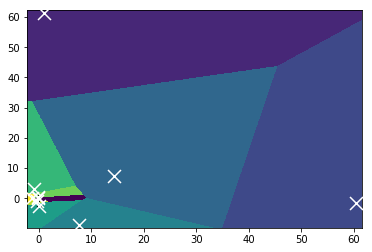

In [63]:
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           aspect='auto', origin='lower')

plt.plot(reduced_maj[:, 0], reduced_maj[:, 1], 'k.', markersize=1)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

In [89]:
for i in range(0,10):
    print "cluster label:",i, "  ", np.count_nonzero(np.where(kmeans.labels_==i)[0])

cluster label: 0    3905
cluster label: 1    1
cluster label: 2    1
cluster label: 3    1
cluster label: 4    1
cluster label: 5    4
cluster label: 6    1
cluster label: 7    9
cluster label: 8    2
cluster label: 9    1


In [90]:
normalizer = Normalizer().fit(data_min)

In [91]:
pca= PCA(n_components=2, whiten=True)
reduced_min= pca.fit_transform(data_min)

In [92]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)

In [93]:
kmeans.fit(reduced_min)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [94]:
for i in range(0,10):
    print "cluster label:",i, "  ", np.count_nonzero(np.where(kmeans.labels_==i)[0])

cluster label: 0    16
cluster label: 1    1
cluster label: 2    1
cluster label: 3    1
cluster label: 4    1
cluster label: 5    1
cluster label: 6    5
cluster label: 7    2
cluster label: 8    1
cluster label: 9    3


In [99]:

from sklearn.utils import resample

In [100]:
data_maj_downsampled = resample(data_maj, 
                                 replace=False,    
                                 n_samples=1000,     
                                 random_state=123)

In [101]:
data_min_upsampled = resample(data_min, 
                                 replace=True,    
                                 n_samples=200,     
                                 random_state=123)

In [102]:
data_maj_downsampled["LABEL"]=1
data_min_upsampled["LABEL"]=2

/home/apoorva/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/apoorva/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [103]:
data_new= pd.concat([data_maj_downsampled,data_min_upsampled])

In [104]:
data_new.shape

(1200, 3198)

In [165]:
data_new.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197,LABEL
3132,-25.69,-47.66,-36.47,-28.12,-42.82,-62.66,-65.80,-67.69,-62.04,-74.87,...,-61.30,-101.23,-92.23,-106.22,-99.47,-11.67,6.11,-24.62,-16.70,1
1534,200.34,200.40,193.34,190.50,212.59,250.53,276.50,257.93,282.59,308.53,...,-359.35,-430.44,-388.28,-413.07,-413.66,-346.47,-324.03,-307.35,-252.25,1
2398,6068.50,5972.00,5929.75,5889.75,5942.25,6002.25,6012.50,5996.00,5982.25,6033.50,...,351.25,325.75,99.75,-4.50,-96.00,818.50,745.50,655.00,438.50,1
1237,-2.95,7.87,-19.20,-7.37,-5.67,-25.73,-26.09,-42.60,-29.21,-32.10,...,15.43,-8.69,-15.18,-5.36,-1.77,-8.39,-19.42,-11.89,-27.04,1
3684,-2355.13,-2208.50,-1876.38,-1719.63,-1287.13,-851.63,-571.13,-77.00,130.24,178.24,...,-379.63,-344.88,-281.76,-263.76,-351.88,-195.00,-398.50,-321.76,-520.76,1


In [197]:
x=data_new.iloc[:,:-1]
y=list(data_new["LABEL"])
        

In [198]:
pca_2= PCA(n_components=20)

In [199]:
x= pca_2.fit_transform(x)

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=123)

In [203]:
x_train

array([[ -5.73376557e+03,  -2.15841549e+03,  -7.68857024e+03, ...,
          6.32224393e+02,  -1.58311742e+03,  -9.11854906e+02],
       [ -5.78151039e+03,  -2.14719137e+03,  -7.16987883e+03, ...,
          8.62191869e+02,   1.47885554e+02,  -8.54928852e+01],
       [ -5.80391384e+03,  -2.10469561e+03,  -7.47456655e+03, ...,
         -5.12760339e+01,  -3.92777211e+02,  -2.48716394e+02],
       ..., 
       [ -4.09869494e+03,  -5.49141195e+03,  -6.74769123e+03, ...,
          7.79179003e+02,   1.07556978e+03,  -2.07039876e+03],
       [ -5.39601881e+03,  -1.99114874e+03,  -8.45356115e+03, ...,
         -9.88529012e+02,  -1.42068836e+03,  -1.21433881e+03],
       [ -6.37328940e+03,  -2.45230245e+03,  -7.63111668e+03, ...,
         -2.15963163e+02,  -7.43980937e+02,   6.18025775e+00]])

In [204]:
svc = svm.SVC()

In [205]:
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [206]:
y_predicted= svc.predict(x_test)

In [207]:
from sklearn import metrics

In [208]:
print(metrics.accuracy_score(y_test, y_predicted))
print(metrics.confusion_matrix(y_test, y_predicted))
metrics.classification_report(y_test, y_predicted)

1.0
[[203   0]
 [  0  37]]


'             precision    recall  f1-score   support\n\n          1       1.00      1.00      1.00       203\n          2       1.00      1.00      1.00        37\n\navg / total       1.00      1.00      1.00       240\n'

In [209]:
from xgboost import XGBClassifier

In [210]:
xgb= XGBClassifier()

In [211]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='binary:logistic', seed=0,
       silent=True, subsample=1)

In [212]:
y_predicted= xgb.predict(x_test)

In [213]:
print(metrics.accuracy_score(y_test, y_predicted))
print(metrics.confusion_matrix(y_test, y_predicted))
metrics.classification_report(y_test, y_predicted)

1.0
[[203   0]
 [  0  37]]


'             precision    recall  f1-score   support\n\n          1       1.00      1.00      1.00       203\n          2       1.00      1.00      1.00        37\n\navg / total       1.00      1.00      1.00       240\n'

In [214]:
reduced_data =pca.fit_transform(x)

In [215]:
svmClassifier_2d=svc.fit(reduced_data, y)

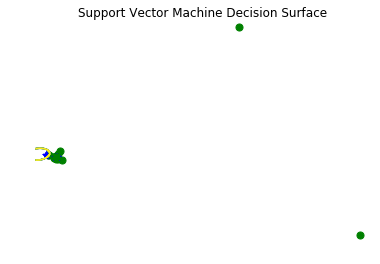

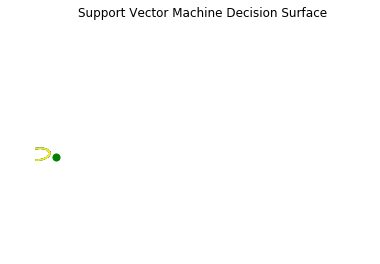

KeyboardInterrupt: 

In [219]:
for i in range(0, reduced_data.shape[0]):
    if y[i] == 1:
        c1 = plt.scatter(reduced_data[i,0],reduced_data[i,1],c='g',    s=50,marker='o')
    elif y[i] == 2:
        c2 = plt.scatter(reduced_data[i,0],reduced_data[i,1],c='b',    s=50,marker='*')
    x_min, x_max = reduced_data[:, 0].min() - 1,   reduced_data[:,0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1,   reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
    Z = svmClassifier_2d.predict(np.c_[xx.ravel(),  yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z)
    plt.title('Support Vector Machine Decision Surface')
    plt.axis('off')
    plt.show()

In [224]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier()
clf = clf.fit(data_new.iloc[:,:-1], y)
features= pd.DataFrame({
    "importance":clf.feature_importances_,
    "columns":data_new.iloc[:,:-1].columns
})

In [231]:
features.sort_values(["importance"], axis=0, ascending=False)

,columns,importance
2346,FLUX.2347,0.014149
500,FLUX.501,0.008539
216,FLUX.217,0.007977
523,FLUX.524,0.007298
1505,FLUX.1506,0.007011
2476,FLUX.2477,0.006664
812,FLUX.813,0.006544
1587,FLUX.1588,0.006370
3169,FLUX.3170,0.006138
85,FLUX.86,0.006003


In [234]:
j=0
for n in range(0, 3197):
    if features["importance"][n]>0:
        print features["columns"][n]
        j=j+1

FLUX.1
FLUX.3
FLUX.9
FLUX.11
FLUX.12
FLUX.13
FLUX.15
FLUX.19
FLUX.25
FLUX.36
FLUX.37
FLUX.40
FLUX.41
FLUX.45
FLUX.52
FLUX.73
FLUX.75
FLUX.84
FLUX.85
FLUX.86
FLUX.96
FLUX.97
FLUX.98
FLUX.102
FLUX.103
FLUX.110
FLUX.112
FLUX.118
FLUX.131
FLUX.135
FLUX.136
FLUX.139
FLUX.143
FLUX.148
FLUX.156
FLUX.159
FLUX.161
FLUX.168
FLUX.173
FLUX.183
FLUX.188
FLUX.191
FLUX.192
FLUX.206
FLUX.208
FLUX.212
FLUX.215
FLUX.216
FLUX.217
FLUX.221
FLUX.226
FLUX.230
FLUX.233
FLUX.235
FLUX.244
FLUX.245
FLUX.252
FLUX.255
FLUX.287
FLUX.295
FLUX.299
FLUX.307
FLUX.310
FLUX.315
FLUX.321
FLUX.328
FLUX.329
FLUX.340
FLUX.354
FLUX.355
FLUX.360
FLUX.367
FLUX.369
FLUX.375
FLUX.384
FLUX.386
FLUX.388
FLUX.393
FLUX.397
FLUX.412
FLUX.414
FLUX.415
FLUX.417
FLUX.425
FLUX.428
FLUX.442
FLUX.444
FLUX.451
FLUX.460
FLUX.461
FLUX.489
FLUX.501
FLUX.507
FLUX.512
FLUX.516
FLUX.521
FLUX.524
FLUX.525
FLUX.527
FLUX.529
FLUX.530
FLUX.536
FLUX.548
FLUX.550
FLUX.556
FLUX.558
FLUX.559
FLUX.569
FLUX.584
FLUX.588
FLUX.589
FLUX.606
FLUX.611
FLUX.615


In [235]:
print j

598
